In [ ]:
#importing libraries

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from math import sqrt
import math
import scipy.stats as stats
import statistics as st
import csv
import seaborn as sns
from scipy.spatial.distance import squareform, pdist, chebyshev, cityblock
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
#importing data

dane = pd.read_excel(r'dane_do_analizy.xlsx', sheet_name = 'dane_trans')
list_of_columns = []
for column in dane.columns:
    list_of_columns.append(column)

In [ ]:
#standard deviation

def standard_deviation(list_of_columns,dane,av): 
    std_dict = {}
    index = 0
    suma = 0      
    for element in list_of_columns[1:]:
        while index != 30:    
            suma += (dane[element][index] - av[element]) **2
            index += 1      
        std_dict[element] = sqrt(suma / len(dane[element]))
        index = 0
        suma = 0        
    return std_dict

#mean

def arithmetic_average(list_of_columns):
    
    dict_mean = {}
    for element in list_of_columns[1:]:
        mean = dane[element].mean()
        dict_mean[element] = mean
        
    return dict_mean

In [ ]:
#arithmetic average
av = arithmetic_average(list_of_columns)
#standard deviation
stdevp = standard_deviation(list_of_columns,dane,av)

In [ ]:
#autoscaling
def autoskalowanie(dane,zmienna):
  przeskalowane = []
  for element in dane[zmienna]:
    element = (element - av[zmienna]) / stdevp[zmienna]
    przeskalowane.append(element)

  return przeskalowane

In [ ]:
#saving to excel

from openpyxl import load_workbook
 
wb = load_workbook('dane_do_analizy.xlsx')
 
sheet = wb.get_sheet_by_name("Autoskalowane")

def save_to_excel(dane,kolumna,sheet):
  wiersz = 2
  now = kolumna + str(wiersz)
  for element in dane:
      sheet[now] = element
      wiersz += 1
      now = kolumna + str(wiersz)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  import sys


In [ ]:
autoskal_calories = autoskalowanie(dane,'calories')
autoskal_protein = autoskalowanie(dane,'protein')
autoskal_fat = autoskalowanie(dane,'fat')
autoskal_sodium = autoskalowanie(dane,'sodium*')
autoskal_fiber = autoskalowanie(dane,'fiber')
autoskal_carbo = autoskalowanie(dane,'carbo*')
autoskal_sugars = autoskalowanie(dane,'sugars')

In [ ]:
save_to_excel(autoskal_calories,'B',sheet)
save_to_excel(autoskal_protein, 'C',sheet)
save_to_excel(autoskal_fat, 'D',sheet)
save_to_excel(autoskal_sodium, 'E',sheet)
save_to_excel(autoskal_fiber, 'F',sheet)
save_to_excel(autoskal_carbo, 'G',sheet)
save_to_excel(autoskal_sugars, 'H',sheet)

wb.save("dane_do_analizy.xlsx")

In [ ]:
#Euclidean distance for objects 

In [ ]:
dane_autoskalowane = pd.read_excel(r'dane_do_analizy.xlsx', sheet_name = 'Autoskalowane')

In [ ]:
df = pd.DataFrame(dane_autoskalowane)
name_of_columns = (dane['name'])

In [ ]:
macierz_odleglosci = np.zeros((30,30))

In [ ]:
#Euclidean distance for objects 
sum = 0
for elementA in range(len(df)):
  for elementB in range(len(df)):
    for attribute in range(1,8):  #bo jest 7 cech płatków (kalorie itd...)
      sum += (df.loc[elementA][attribute] - df.loc[elementB][attribute])**2
    macierz_odleglosci[elementA][elementB] = sqrt(sum) #wstawienie do macierzy zawierającej zera
    sum = 0

In [ ]:
#saving to excel
dataframe = pd.DataFrame(macierz_odleglosci)
dataframe.columns = name_of_columns
dataframe.index = name_of_columns
dataframe.to_excel(excel_writer = "macierz_odległości_euklidesowej.xlsx")

In [ ]:
#Euclidean distance for objects 
A = pd.DataFrame(squareform(pdist(df.iloc[:, 1:])), columns=df.name.unique(), index=df.name.unique())
A.round(decimals = 2)

,Bran Chex,Bran Flakes,Cap'n'Crunch,Cinnamon Toast Crunch,Clusters,Cocoa Puffs,Corn Chex,Corn Flakes,Corn Pops,Count Chocula,...,Fruity Pebbles,Golden Crisp,Golden Grahams,Grape Nuts Flakes,Grape-Nuts,Great Grains Pecan,Honey Graham Ohs,Honey Nut Cheerios,Honey-comb,Just Right Crunchy Nuggets
Bran Chex,0.00,1.86,5.06,5.11,3.33,4.24,4.36,3.85,4.08,4.24,...,4.11,4.66,4.14,1.98,3.14,4.78,4.72,3.68,4.03,3.12
Bran Flakes,1.86,0.00,6.00,6.24,3.82,5.16,4.96,4.37,4.82,5.16,...,5.12,5.04,5.13,2.31,3.10,5.25,5.64,3.77,4.86,4.04
Cap'n'Crunch,5.06,6.00,0.00,1.37,3.41,1.71,4.67,5.43,3.03,1.71,...,2.00,4.34,2.60,4.67,4.85,4.28,0.66,3.12,2.60,3.19
Cinnamon Toast Crunch,5.11,6.24,1.37,0.00,3.29,2.66,4.73,5.48,3.78,2.66,...,2.68,5.08,2.98,4.65,4.92,3.73,1.38,3.65,3.39,3.16
Clusters,3.33,3.82,3.41,3.29,0.00,3.33,4.42,4.87,3.51,3.33,...,3.15,3.99,3.94,1.92,2.71,2.07,3.15,2.19,3.58,2.16
Cocoa Puffs,4.24,5.16,1.71,2.66,3.33,0.00,4.52,5.10,1.74,0.00,...,0.76,2.90,2.58,4.05,4.44,4.71,1.87,2.91,1.42,2.83
Corn Chex,4.36,4.96,4.67,4.73,4.42,4.52,0.00,1.55,4.73,4.52,...,4.42,6.12,2.66,4.04,3.23,5.70,4.59,4.00,3.63,2.77
Corn Flakes,3.85,4.37,5.43,5.48,4.87,5.10,1.55,0.00,5.37,5.10,...,5.09,6.54,3.13,4.09,3.64,6.30,5.28,4.31,4.34,3.51
Corn Pops,4.08,4.82,3.03,3.78,3.51,1.74,4.73,5.37,0.00,1.74,...,1.33,2.35,3.58,3.73,3.90,4.73,2.98,3.57,1.38,2.74
Count Chocula,4.24,5.16,1.71,2.66,3.33,0.00,4.52,5.10,1.74,0.00,...,0.76,2.90,2.58,4.05,4.44,4.71,1.87,2.91,1.42,2.83


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


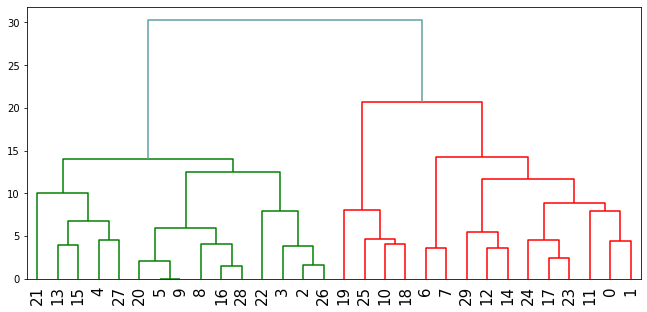

In [ ]:
#df = df.set_index('name') #ustawianie indexów płatków w dendrogramach

Z = linkage(macierz_odleglosci, 'ward')

fig = plt.figure(figsize=(11, 5))

dn = dendrogram(Z, labels=df.index, leaf_rotation=90, leaf_font_size=15,above_threshold_color='#5F9EA0')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


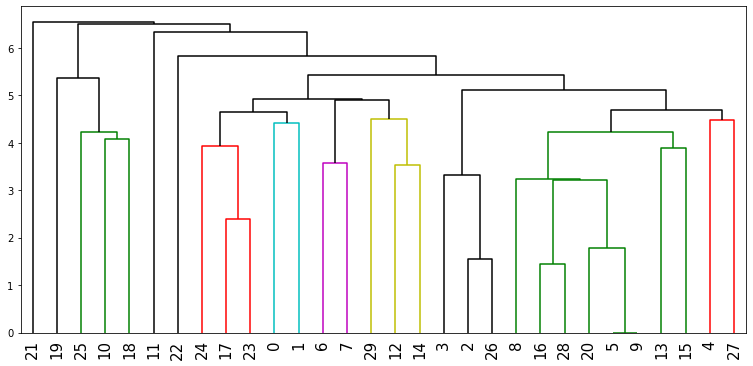

In [ ]:
Z = linkage(macierz_odleglosci, 'single')

fig = plt.figure(figsize=(13, 6))

dn = dendrogram(Z, labels=df.index, leaf_rotation=90, leaf_font_size=15,above_threshold_color='black')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


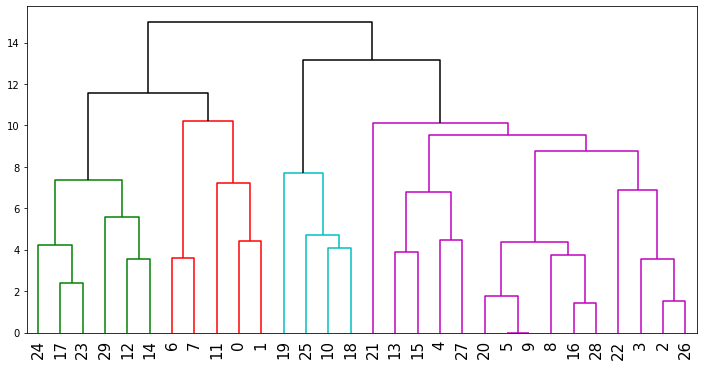

In [ ]:
Z = linkage(macierz_odleglosci, 'complete')

fig = plt.figure(figsize=(12, 6))

dn = dendrogram(Z, labels=df.index, leaf_rotation=90, leaf_font_size=15, above_threshold_color='black')

In [ ]:
macierz_odleglosci_czebyszewa = np.zeros((30,30))

In [ ]:
#chebyshev distance for objects 
max_attribute = 0
potential_max_attribute = 0
for elementA in range(len(df)):
  for elementB in range(len(df)):
    for attribute in range(1,8):  #bo jest 7 cech płatków (kalorie itd...)
      potential_max_attribute = df.loc[elementA][attribute] - df.loc[elementB][attribute]
      if potential_max_attribute >= max_attribute:
        max_attribute = potential_max_attribute
      
      macierz_odleglosci_czebyszewa[elementA][elementB] = max_attribute #wstawienie do macierzy zawierającej zera
    max_attribute = 0
    potential_max_attribute = 0

In [ ]:
#saving to excel
dataframe = pd.DataFrame(macierz_odleglosci_czebyszewa)
dataframe.columns = name_of_columns
dataframe.index = name_of_columns
dataframe.to_excel(excel_writer = "macierz_odleglości_czebyszewa.xlsx")

In [ ]:
macierz_odleglosci_czebyszewa = pd.read_excel(r'macierz_odleglości_czebyszewa.xlsx')
frame_czebyszew = pd.DataFrame(macierz_odleglosci_czebyszewa)
frame_czebyszew.iloc[:, 1:].round(decimals = 2)

,Bran Chex,Bran Flakes,Cap'n'Crunch,Cinnamon Toast Crunch,Clusters,Cocoa Puffs,Corn Chex,Corn Flakes,Corn Pops,Count Chocula,...,Fruity Pebbles,Golden Crisp,Golden Grahams,Grape Nuts Flakes,Grape-Nuts,Great Grains Pecan,Honey Graham Ohs,Honey Nut Cheerios,Honey-comb,Just Right Crunchy Nuggets
0,0.00,1.02,2.44,2.44,1.22,2.44,2.44,1.83,1.83,2.44,...,2.44,2.44,2.44,0.76,1.02,1.65,1.83,1.53,2.44,1.83
1,1.20,0.00,3.05,3.05,1.83,3.05,3.05,2.44,2.44,3.05,...,3.05,3.05,3.05,1.22,1.28,1.79,2.44,2.14,3.05,2.44
2,3.66,3.66,0.00,0.77,1.28,1.22,2.67,2.56,2.04,1.22,...,1.22,2.53,1.22,2.44,2.31,2.05,0.26,1.22,2.04,1.73
3,3.66,3.66,1.02,0.00,1.22,2.04,3.07,3.07,3.07,2.04,...,2.04,3.07,2.04,2.44,3.07,1.79,1.02,2.04,3.07,2.04
4,2.44,2.44,2.39,2.39,0.00,2.39,2.22,2.07,2.39,2.39,...,2.39,2.04,2.39,1.22,2.04,0.89,2.39,1.02,2.39,1.28
5,2.44,2.44,0.26,1.03,1.54,0.00,2.67,2.82,1.15,0.00,...,0.56,1.97,1.17,2.05,2.56,2.31,0.51,0.77,1.02,1.79
6,2.44,2.44,1.50,1.65,2.55,2.05,0.00,1.22,3.21,2.05,...,2.61,4.02,1.20,2.55,2.18,3.44,1.50,0.95,2.05,2.18
7,2.46,2.32,2.17,2.32,3.22,2.72,0.67,0.00,3.88,2.72,...,3.28,4.69,1.20,3.22,2.85,4.11,2.17,1.62,2.72,2.85
8,2.44,2.44,0.61,0.77,1.28,0.61,2.31,2.56,0.00,0.61,...,0.61,1.22,0.77,1.79,2.31,2.05,0.26,0.51,0.61,1.54
9,2.44,2.44,0.26,1.03,1.54,0.00,2.67,2.82,1.15,0.00,...,0.56,1.97,1.17,2.05,2.56,2.31,0.51,0.77,1.02,1.79


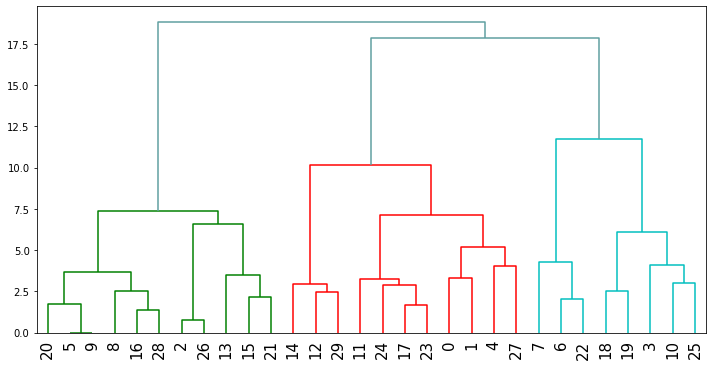

In [ ]:
Z = linkage(frame_czebyszew.iloc[:, 1:], 'ward')

fig = plt.figure(figsize=(12, 6))

dn = dendrogram(Z, labels=df.index, leaf_rotation=90, leaf_font_size=15,above_threshold_color='#5F9EA0')

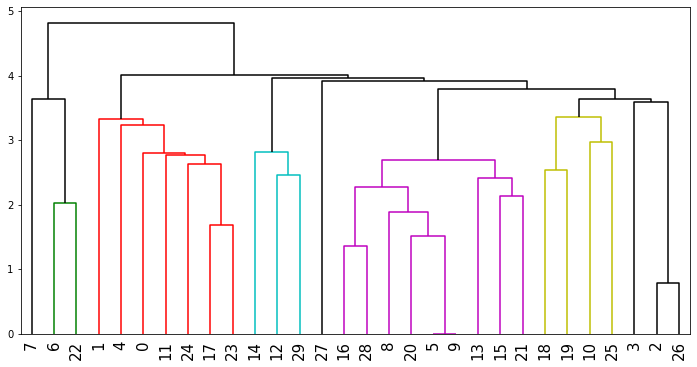

In [ ]:
Z = linkage(frame_czebyszew.iloc[:, 1:], 'single')

fig = plt.figure(figsize=(12, 6))

dn = dendrogram(Z, labels=df.index, leaf_rotation=90, leaf_font_size=15, above_threshold_color='black')

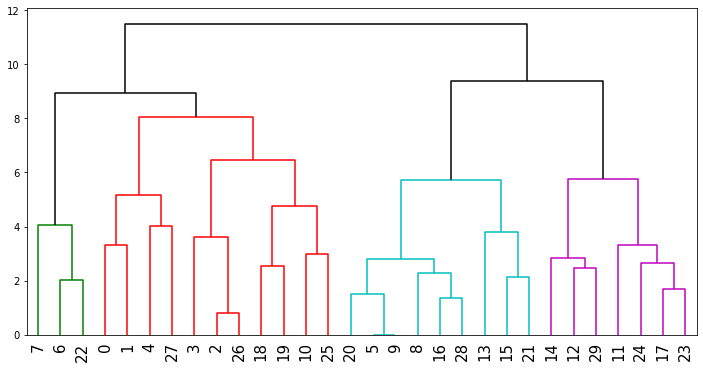

In [ ]:
Z = linkage(frame_czebyszew.iloc[:, 1:], 'complete')

fig = plt.figure(figsize=(12, 6))

dn = dendrogram(Z, labels=df.index, leaf_rotation=90, leaf_font_size=15, above_threshold_color='black')

In [ ]:
macierz_odleglosci_manhattan = np.zeros((30,30))

#manhattan distance for objects 
sum = 0
for elementA in range(len(df)):
  for elementB in range(len(df)):
    for attribute in range(1,8):  #bo jest 7 cech płatków (kalorie itd...)
      sum += cityblock(df.loc[elementA][attribute],df.loc[elementB][attribute])
    macierz_odleglosci_manhattan[elementA][elementB] = sum #wstawienie do macierzy zawierającej zera
    sum = 0

In [ ]:
#saving to excel
dataframe = pd.DataFrame(macierz_odleglosci_manhattan)
dataframe.columns = name_of_columns
dataframe.index = name_of_columns
dataframe.to_excel(excel_writer = "macierz_odległości_manhattan.xlsx")

In [ ]:
macierz_odleglosci_manhattan = pd.read_excel(r'macierz_odległości_manhattan.xlsx')
frame_manhattan = pd.DataFrame(macierz_odleglosci_manhattan)
frame_manhattan.iloc[:, 1:].round(decimals = 2)

,Bran Chex,Bran Flakes,Cap'n'Crunch,Cinnamon Toast Crunch,Clusters,Cocoa Puffs,Corn Chex,Corn Flakes,Corn Pops,Count Chocula,...,Fruity Pebbles,Golden Crisp,Golden Grahams,Grape Nuts Flakes,Grape-Nuts,Great Grains Pecan,Honey Graham Ohs,Honey Nut Cheerios,Honey-comb,Just Right Crunchy Nuggets
0,0.00,3.95,11.32,10.97,7.62,9.31,9.96,8.90,10.17,9.31,...,9.16,10.93,8.64,4.04,6.98,10.39,10.46,8.46,8.98,5.21
1,3.95,0.00,13.54,13.19,7.73,11.81,11.07,10.01,10.63,11.81,...,11.66,11.39,12.30,5.09,5.98,9.99,12.68,8.29,10.21,9.16
2,11.32,13.54,0.00,2.39,7.62,3.06,10.93,13.54,6.04,3.06,...,3.81,9.51,5.68,11.71,12.21,9.69,0.87,6.87,4.92,8.00
3,10.97,13.19,2.39,0.00,7.27,5.15,10.89,13.49,7.22,5.15,...,5.00,11.60,5.64,11.36,11.86,7.29,2.75,8.24,5.59,7.65
4,7.62,7.73,7.62,7.27,0.00,7.12,10.26,11.64,6.99,7.12,...,5.98,10.19,8.42,4.09,5.33,4.51,6.75,4.41,7.57,4.73
5,9.31,11.81,3.06,5.15,7.12,0.00,9.51,12.11,3.49,0.00,...,1.27,6.45,4.25,9.16,9.66,11.63,3.92,5.44,2.37,5.45
6,9.96,11.07,10.93,10.89,10.26,9.51,0.00,2.91,9.54,9.51,...,9.36,11.52,5.25,9.83,6.15,13.23,11.29,8.80,7.13,5.52
7,8.90,10.01,13.54,13.49,11.64,12.11,2.91,0.00,10.92,12.11,...,11.96,11.69,7.85,8.77,7.53,14.61,12.67,10.18,9.74,6.91
8,10.17,10.63,6.04,7.22,6.99,3.49,9.54,10.92,0.00,3.49,...,2.23,5.60,6.33,9.03,8.22,10.18,5.68,7.20,2.41,6.06
9,9.31,11.81,3.06,5.15,7.12,0.00,9.51,12.11,3.49,0.00,...,1.27,6.45,4.25,9.16,9.66,11.63,3.92,5.44,2.37,5.45


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


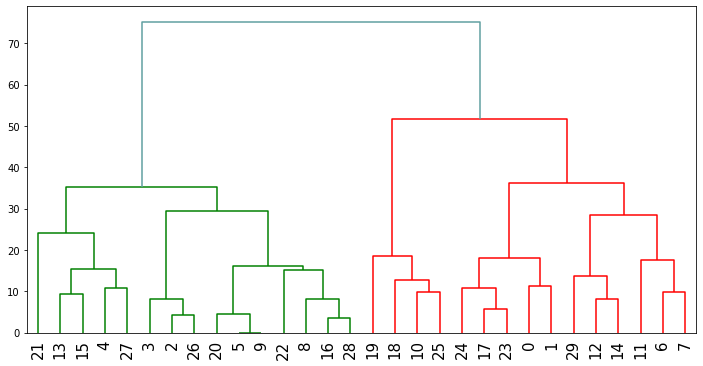

In [ ]:
Z = linkage(frame_manhattan.iloc[:, 1:], 'ward')

fig = plt.figure(figsize=(12, 6))

dn = dendrogram(Z, labels=df.index, leaf_rotation=90, leaf_font_size=15,above_threshold_color='#5F9EA0')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


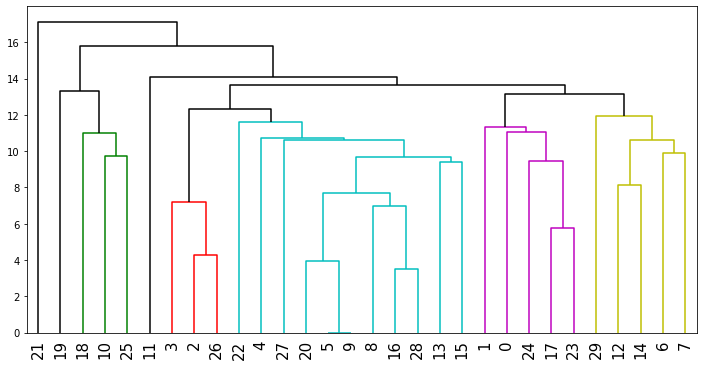

In [ ]:
Z = linkage(frame_manhattan.iloc[:, 1:], 'single')

fig = plt.figure(figsize=(12, 6))

dn = dendrogram(Z, labels=df.index, leaf_rotation=90, leaf_font_size=15, above_threshold_color='black')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


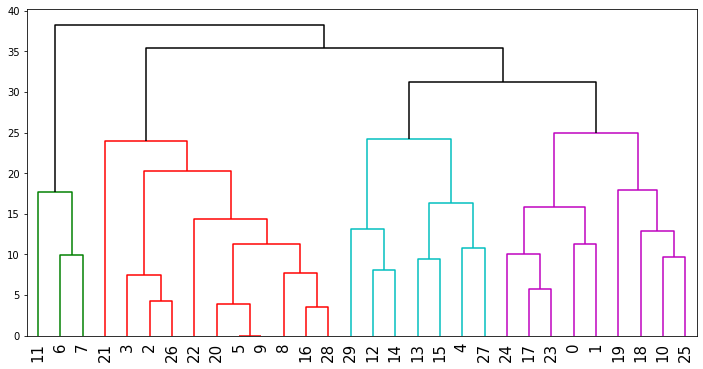

In [ ]:
Z = linkage(frame_manhattan.iloc[:, 1:], 'complete')

fig = plt.figure(figsize=(12, 6))

dn = dendrogram(Z, labels=df.index, leaf_rotation=90, leaf_font_size=15, above_threshold_color='black')

In [192]:
#HCA ANALYSIS FOR FEATURES

In [191]:
df_transpose = dane_autoskalowane.transpose()
macierz_korelacji = np.corrcoef(df_transpose)
macierz_korelacji = pd.DataFrame(macierz_korelacji)

#complementary distance 1 method
list_of_features = []
for element in df.columns:
    list_of_features.append(element)

odleglosc_dopelniajaca = {}
index = 0 
for element in range(0,7):
    odleglosc_dopelniajaca[list_of_features[element]]  = macierz_korelacji.iloc[element] - 1
odleglosc_dopelniajaca = pd.DataFrame(odleglosc_dopelniajaca)

#complementary distance 2 method
dane_autoskalowane = pd.read_excel(r'dane_do_analizy.xlsx', sheet_name = 'Autoskalowane',index_col = 0)
odleglosc_dopelniajaca = abs(macierz_korelacji - 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


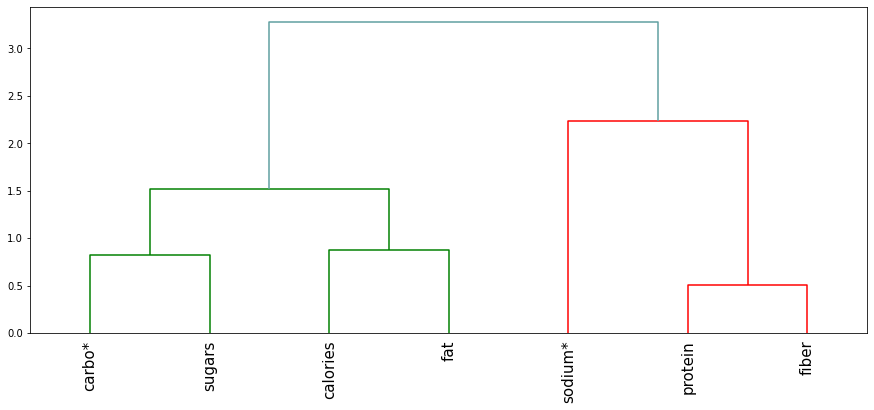

In [ ]:
Z = linkage(odleglosc_dopelniajaca, 'ward')

fig = plt.figure(figsize=(15, 6))

dn = dendrogram(Z, labels = list_of_features[1:], leaf_rotation=90, leaf_font_size=15,above_threshold_color='#5F9EA0')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


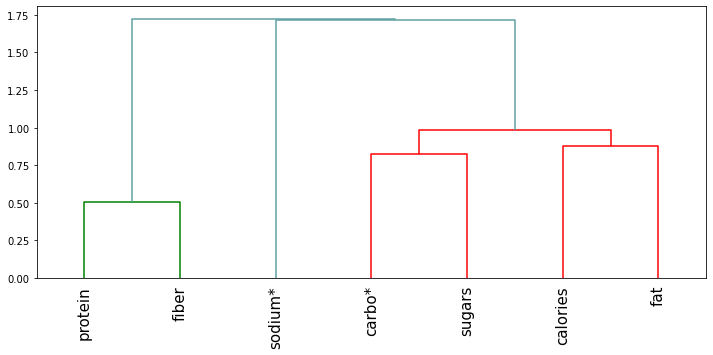

In [ ]:
Z = linkage(odleglosc_dopelniajaca, 'single')

fig = plt.figure(figsize=(12, 5))

dn = dendrogram(Z, labels = list_of_features[1:], leaf_rotation=90, leaf_font_size=15,above_threshold_color='#5F9EA0')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


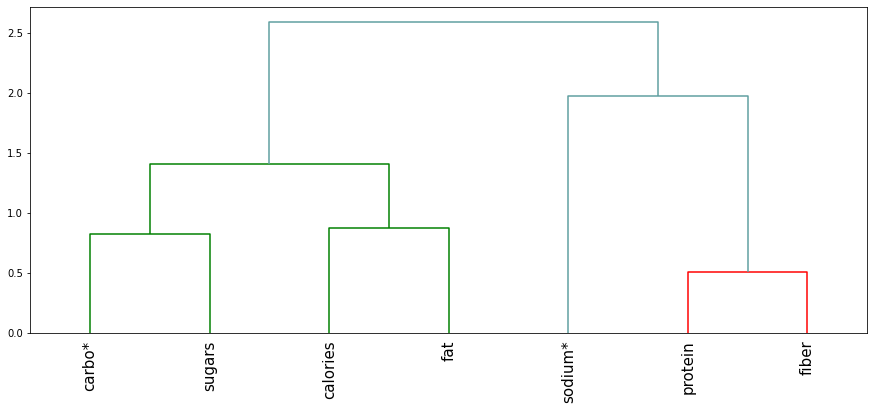

In [ ]:
Z = linkage(odleglosc_dopelniajaca, 'complete')

fig = plt.figure(figsize=(15, 6))

dn = dendrogram(Z, labels = list_of_features[1:], leaf_rotation=90, leaf_font_size=15,above_threshold_color='#5F9EA0')

In [ ]:
#hca

macierz_odl_eukl =  pd.read_excel(r'macierz_odległości_euklidesowej.xlsx')
macierz_odl_eukl = macierz_odl_eukl.drop(['name'],axis = 1) #usuwam nazwy płatków
macierz = np.tril(macierz_odl_eukl, -1) 
macierz = pd.DataFrame(macierz)
macierz_flatten = np.array(macierz).flatten()


def find_minimum(macierz_flatten):
  maximum = max(macierz_flatten)
  index1 = []
  index2 = []
  actual_min_value = maximum
  actual_second_min_value = maximum
  for element in macierz_flatten:
    if element > 0 and element < actual_min_value:
      actual_min_value = actual_second_min_value = element
      index1 = np.where(macierz==actual_min_value)

    if element > actual_min_value and element < actual_second_min_value:
      actual_second_min_value = element
      index2 = np.where(macierz==actual_second_min_value)

  min_values = [actual_min_value,actual_second_min_value]
  indexes = [index1,index2]
  return min_values,indexes

In [ ]:
min,index = find_minimum(macierz_flatten)

In [ ]:
print(min)
print(index)

[0.6618143074184364, 0.6618143074184364]
[(array([26]), array([2])), []]
